#### This dataset is about house prices. Here I will be trying to predict the price of a house based on its features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### It appears that no value has null sections.

In [5]:
nulls = df.isnull().sum().sort_values()
nulls

id               0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
sqft_living15    0
condition        0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
date             0
view             0
sqft_lot15       0
dtype: int64

#### Converting dates into datetime, and seperating for year, month, and day.

In [6]:
df["date"] = pd.to_datetime(df["date"].str.strip(), format="%Y/%m/%d")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [8]:
df.drop("id", axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


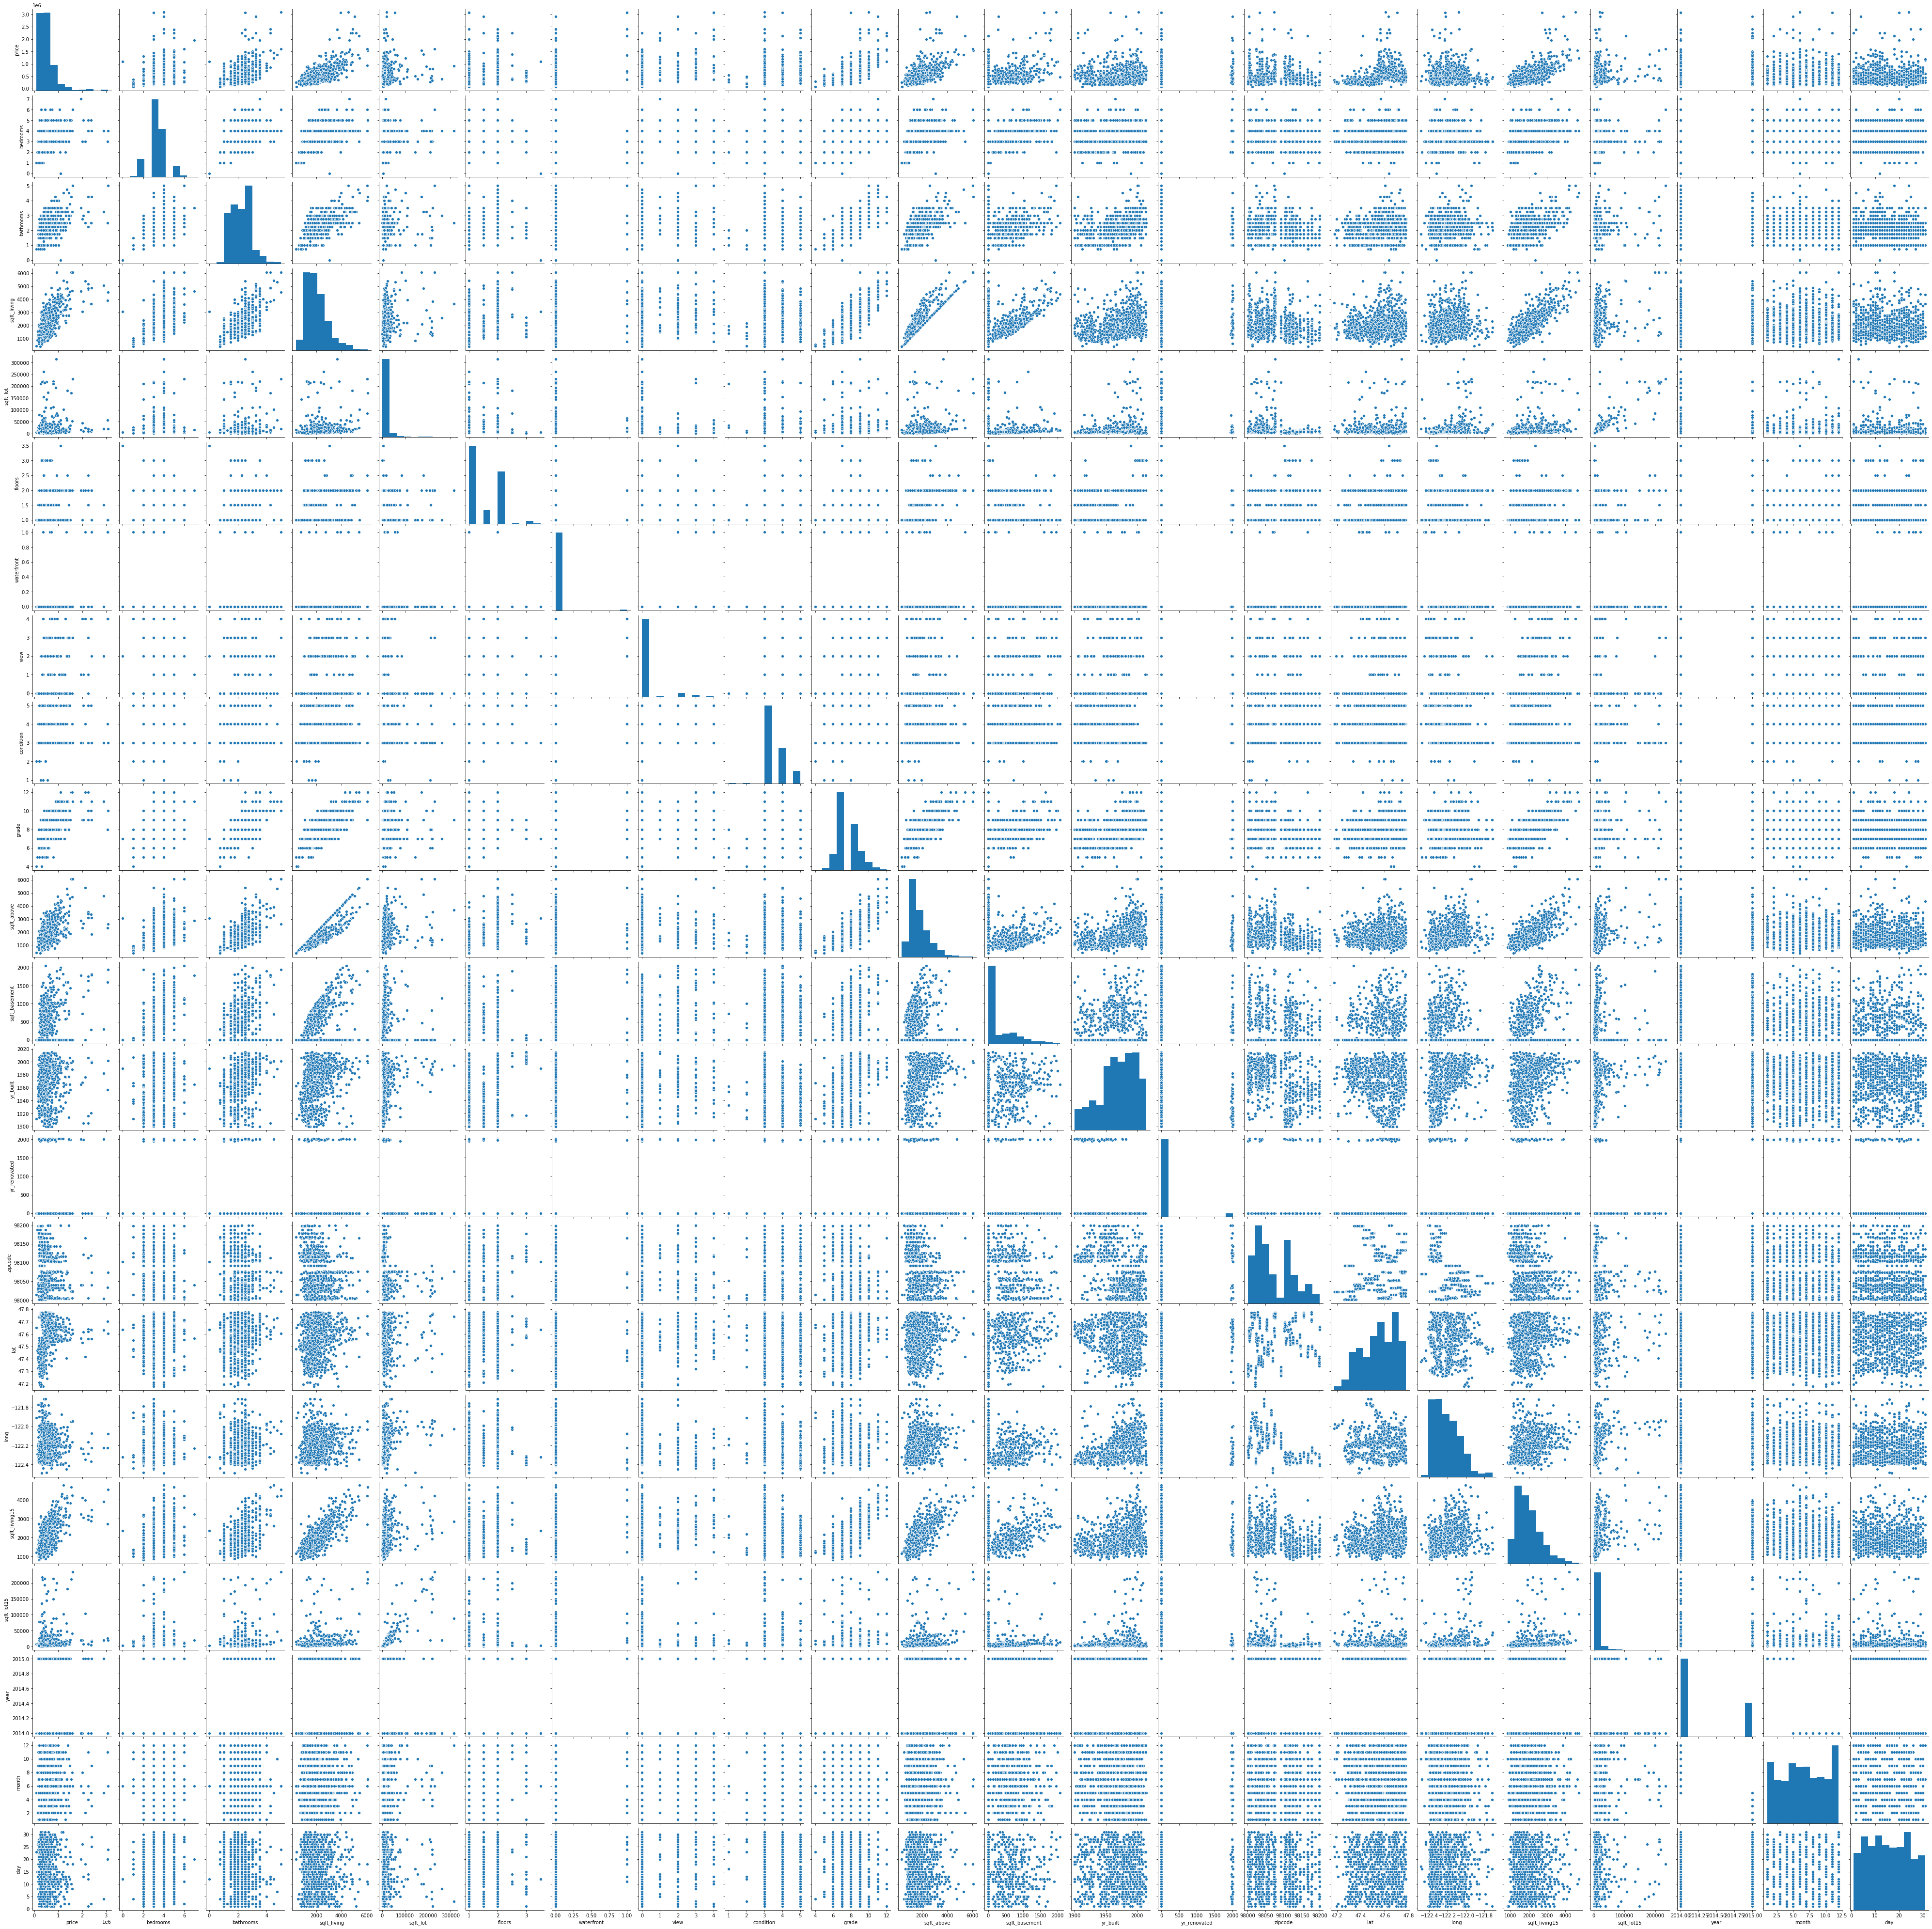

In [9]:
import seaborn as sns 
sns.pairplot(df[:1000])

#### Lets try to predict the house price using linear regression.

In [10]:
y = df["price"]
X = df.drop(["price","date"], axis=1)

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
results = reg.predict(X_test)
results

array([1504713.52051453,  253194.99602728,  371033.48735815, ...,
        368979.39068887,  459990.56246305,  493061.0489298 ])

In [13]:
reg.score(X_test,y_test)

0.7018337079606716

In [14]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

#### Accuracy of 69%. not that good. lets try OHE for values that have a low amount of unique values.

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = pd.get_dummies(data=df, columns=["view","floors","condition","bedrooms"])
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bathrooms      21613 non-null  float64       
 3   sqft_living    21613 non-null  int64         
 4   sqft_lot       21613 non-null  int64         
 5   waterfront     21613 non-null  int64         
 6   grade          21613 non-null  int64         
 7   sqft_above     21613 non-null  int64         
 8   sqft_basement  21613 non-null  int64         
 9   yr_built       21613 non-null  int64         
 10  yr_renovated   21613 non-null  int64         
 11  zipcode        21613 non-null  int64         
 12  lat            21613 non-null  float64       
 13  long           21613 non-null  float64       
 14  sqft_living15  21613 non-null  int64         
 15  sqft_lot15     2161

In [16]:
y = enc["price"]
X = enc.drop(["price","date"], axis=1)

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
reg.fit(X_train, y_train)

reg.score(X_test,y_test)

0.7025136113566035

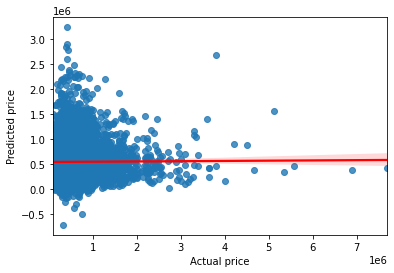

In [27]:
sns.regplot(x=y_test, y=results, line_kws={'color':'red'})
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.show()

#### Accuracy of 70.2%. better, but not good yet. Let's try adding a new value of "last time renovated" - weather the house has been renovated and when.

In [18]:
def renovate(year, new_year):
    if new_year != 0:
        return 2021 - new_year
    return 2021 - year
        

df["last_renovated"] = df.apply(lambda x: renovate(x.yr_built, x.yr_renovated), axis=1)

In [19]:
df.last_renovated

0        66
1        30
2        88
3        56
4        34
         ..
21608    12
21609     7
21610    12
21611    17
21612    13
Name: last_renovated, Length: 21613, dtype: int64

In [28]:
y = enc["price"]
X = enc.drop(["price","date"], axis=1)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
reg.fit(X_train, y_train)

reg.score(X_test,y_test)

0.6999487347971941

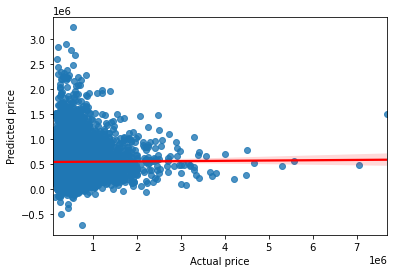

In [29]:
sns.regplot(x=y_test, y=results, line_kws={'color':'red'})
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.show()

#### Accuracy of 70.9%. I don't think I can do better than that. Luckily, a module named XGBOOST can give us better solutions and deals better with structured data.

In [21]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8575802808357877


C:\Users\guyga\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


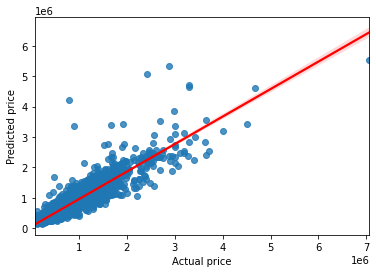

In [25]:
sns.regplot(x=y_test, y=predictions, line_kws={'color':'red'})
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.show()

#### Accuracy of 85%!